In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
%matplotlib inline  

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print mnist.train.images[1,:].shape

(784,)


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


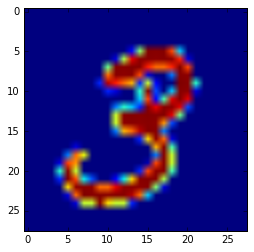

In [4]:
plt.imshow(np.reshape(mnist.train.images[1,:],(28,28)))
print mnist.train.labels[1]

### Defining model

In [5]:
x = tf.placeholder(tf.float32, [None, 784])

In [6]:
with tf.device('cpu:0'):
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))

In [7]:
evidence = tf.matmul(x, W) + b

In [8]:
y = tf.nn.softmax(evidence)

#### Loss function

In [9]:
y_ = tf.placeholder(tf.float32, [None, 10]) # Correct answer

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [12]:
init = tf.initialize_all_variables()

In [13]:
sess = tf.Session()
with tf.device('cpu:0'): 
    sess.run(init)

In [47]:
with tf.device('cpu:0'): 
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

### Evaluate

In [15]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [16]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9195


### Peeking through the learnt features

In [48]:
weights = sess.run(W)

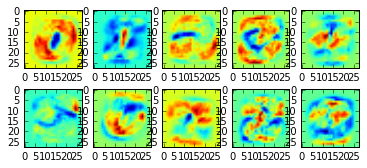

In [49]:
plt.subplot(2,5,1)
for i in range(10):
    plt.subplot(3,5,i+1)
    plt.imshow(np.reshape(weights[:,i],(28,28)))